In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
wordnet_sim = pd.read_csv('NT_trials_all_sims_with_NaNs.csv')

In [4]:
target_uni = wordnet_sim['target'].unique()

avg_data = pd.DataFrame(columns = ['target','prime','RT', 'RT_std','acc', 'acc_std','path sim', 'wu palmer','leacock-chodorow','resnik','jiang-conrath', 'lin']) 


for target in target_uni:
    
    subset_upper = wordnet_sim[wordnet_sim['target'] == target]

    prime_uni = subset_upper['prime'].unique()

    for prime in prime_uni:

        subset_lower = subset_upper[subset_upper['prime'] == prime]

        row = {'target': [target],'prime': [prime],\
            'RT': [subset_lower['RT'].mean()], \
                'RT_std': [subset_lower['RT'].std()], 'acc': [subset_lower['accuracy'].mean()], 'acc_std': [subset_lower['accuracy'].std()], \
                    'path sim': [subset_lower['Path Similarity'].iloc[0]], \
                        'wu palmer': [subset_lower['Wu-Palmer Similarity'].iloc[0]],\
                            'leacock-chodorow': [subset_lower['Leacock-Chodorow Similarity'].iloc[0]],\
                                'resnik': [subset_lower['Resnik Similarity'].iloc[0]],\
                                    'jiang-conrath': [subset_lower['Jiang-Conrath Similarity'].iloc[0]],\
                                        'lin': [subset_lower['Lin Similarity'].iloc[0]]}

        row_df = pd.DataFrame(row)
        avg_data = pd.concat([avg_data, row_df], axis=0, ignore_index=True)

In [39]:
# path_sim_uni = avg_data['path sim'].unique()

# for psu in path_sim_uni:
#     avg_data[avg_data['path sim'] == psu].describe().to_csv('path_sim describe ' + str(psu) + '.csv')

pd.read_csv('path_sim describe 0.0.csv')


,Unnamed: 0,RT,RT_std,acc,acc_std,path sim,wu palmer,leacock-chodorow,resnik,jiang-conrath,lin
0,count,148.000000,140.000000,148.000000,140.000000,148.0,148.0,148.0,148.0,148.0,148.0
1,mean,562.329884,186.871202,0.980111,0.064632,0.0,0.0,0.0,0.0,0.0,0.0
2,std,123.150430,78.368062,0.089084,0.093908,0.0,0.0,0.0,0.0,0.0,0.0
3,min,425.437500,47.781447,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,25%,515.861538,128.201240,0.984848,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,50%,543.929760,160.841577,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,75%,574.398936,232.883047,1.000000,0.123091,0.0,0.0,0.0,0.0,0.0,0.0
7,max,1899.000000,429.462395,1.000000,0.517549,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:

def get_sim(sim):
    sim_uni = avg_data[sim].unique()
    sim_uni.sort()

    rt = []
    rt_std = []
    acc = []
    acc_std = []

    for s in sim_uni:
        sim_data = avg_data[avg_data[sim] == s]

        rt.append(sim_data['RT'].mean())
        rt_std.append(sim_data['RT_std'].mean())
        acc.append(sim_data['acc'].mean())
        acc_std.append(sim_data['acc_std'].mean())
    return [rt, rt_std, acc, acc_std, sim_uni, sim]


In [30]:
path = get_sim('path sim')
wu = get_sim('wu palmer')
leacock = get_sim('leacock-chodorow')
res = get_sim('resnik')
jiang = get_sim('jiang-conrath')
lin = get_sim('lin')

sim = [path, wu, leacock, res, jiang, lin]


C:\Users\42069v3\AppData\Local\Temp/ipykernel_21140/459436764.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


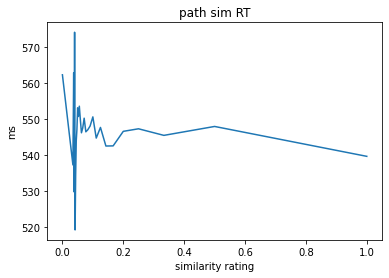

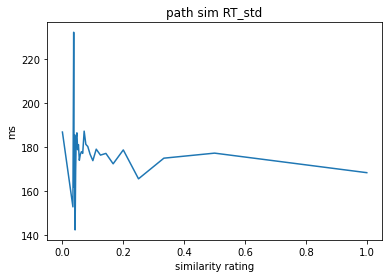

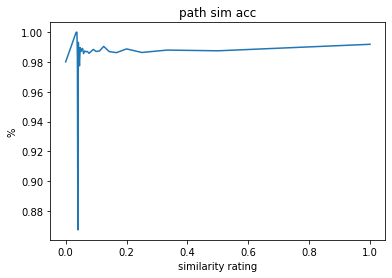

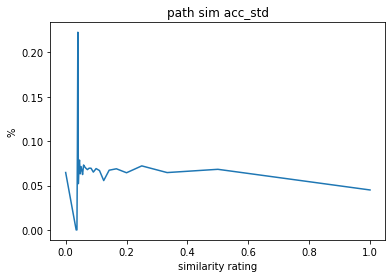

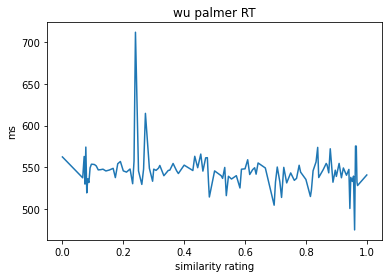

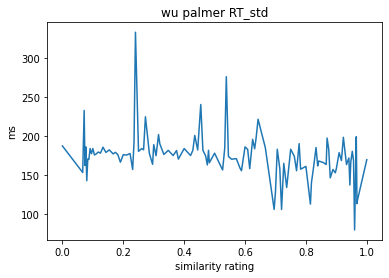

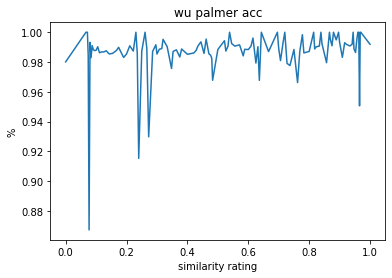

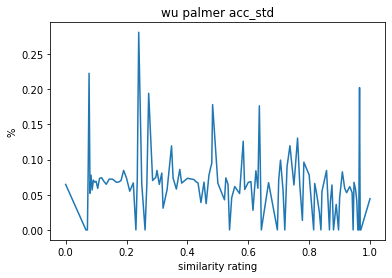

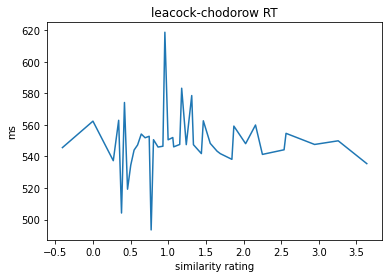

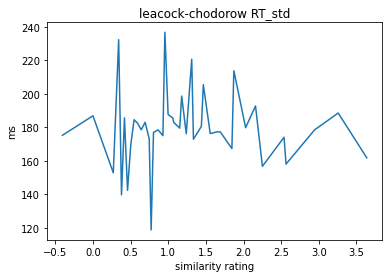

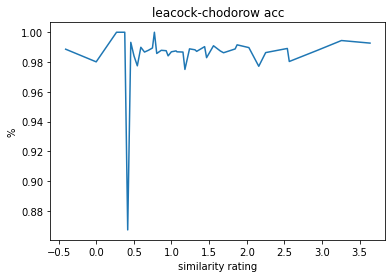

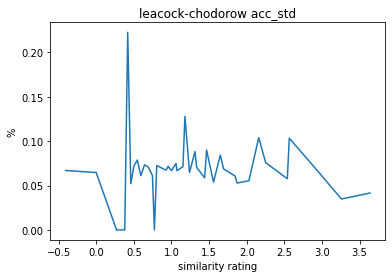

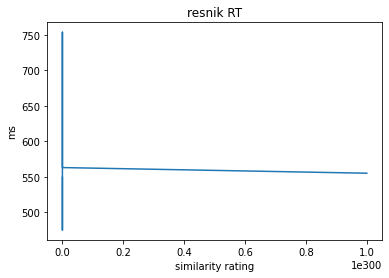

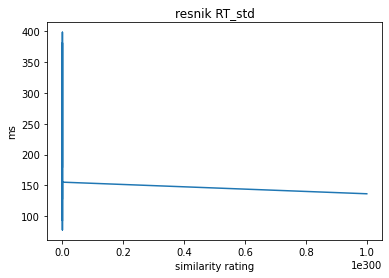

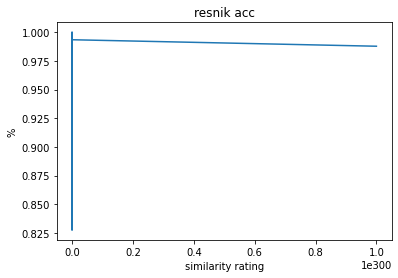

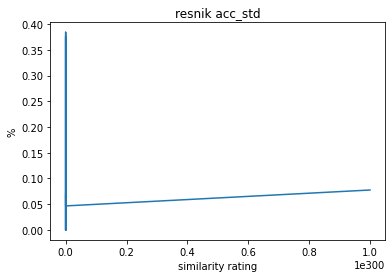

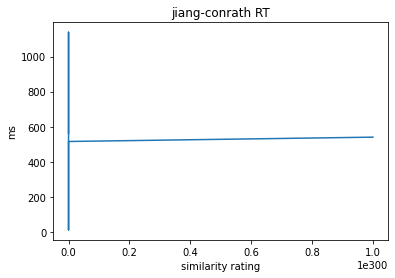

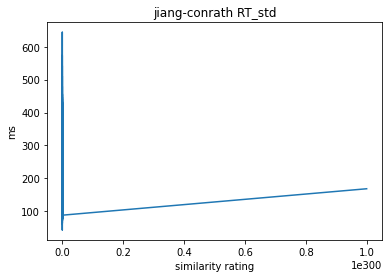

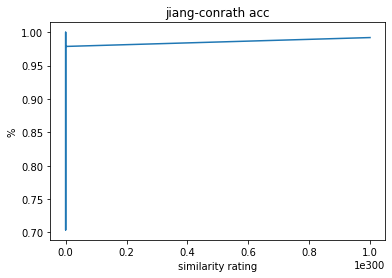

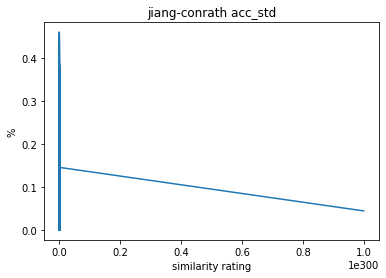

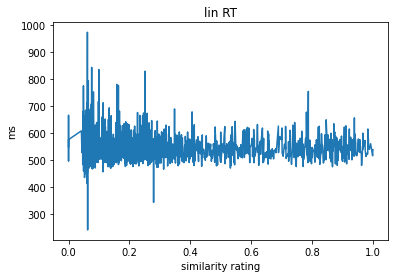

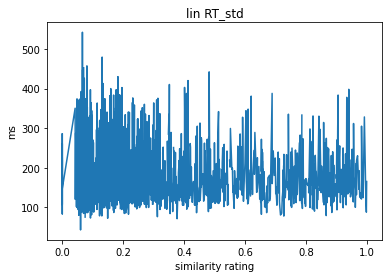

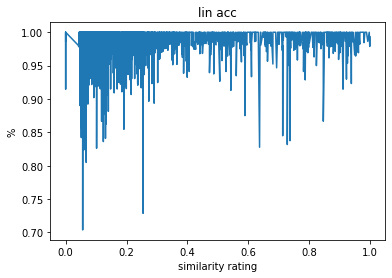

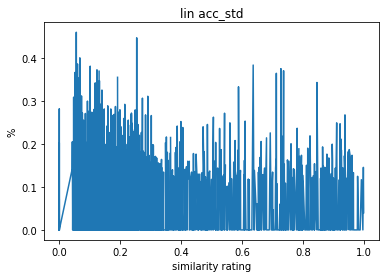

In [41]:
types = ['RT','RT_std','acc','acc_std']
axis = ['ms','ms','%','%']

for s in sim:
    for i in range(4):
        plt.figure()
        plt.plot(s[4], s[i])
        plt.title(s[5] + ' ' + types[i])
        plt.xlabel('similarity rating')
        plt.ylabel(axis[i])
        plt.show()
        # plt.savefig(s[5] + ' ' + types[i] + '.png')